In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import numpy as np

In [3]:
import os

program = "coloring"

results_dir = os.path.join(
    os.getenv("CVF_PROJECT_DIR", ""),
    "cvf-analysis",
    "v2",
    "results",
    program
)

In [4]:
def parse_graph_name(name):
    return name.split("__")[1].split(".csv")[0]

In [5]:
results_file = "rank_effects_avg__star_graph_n15.csv"


In [6]:
file_path = os.path.join(results_dir, results_file)

In [7]:
df = pd.read_csv(file_path)
df

,Unnamed: 0,rank effect,count
0,0,-14,28
1,1,-13,364
2,2,-12,2394
3,3,-11,9464
4,4,-10,26208
5,5,-9,52052
6,6,-8,78806
7,7,-7,89232
8,8,-6,80080
9,9,-5,52052


In [8]:
ml_cvf_file_path = os.path.join("ml_predictions", "lstm_trained_at_2025_04_10_00_11__rank_effect_ml_pred__star_graph_n15.txt")

f = open(ml_cvf_file_path, "r")
data = np.array(f.read().split(",")[:-1], dtype=float)
f.close()

In [9]:
data = np.floor(data+0.5)
data

array([5., 5., 5., ..., 0., 0., 0.])

In [10]:
counts, bin_edges = np.histogram(data)

bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

df_ml = pd.DataFrame({'rank effect': bin_centers, 'ml_count': counts})
df_ml

,rank effect,ml_count
0,-9.0,246
1,-7.0,51123
2,-5.0,39812
3,-3.0,26746
4,-1.0,147121
5,1.0,1784892
6,3.0,57828
7,5.0,100984
8,7.0,227924
9,9.0,65108


In [11]:
df = pd.merge(df, df_ml, how='left').fillna(0)
df

,Unnamed: 0,rank effect,count,ml_count
0,0,-14,28,0.0
1,1,-13,364,0.0
2,2,-12,2394,0.0
3,3,-11,9464,0.0
4,4,-10,26208,0.0
5,5,-9,52052,246.0
6,6,-8,78806,0.0
7,7,-7,89232,51123.0
8,8,-6,80080,0.0
9,9,-5,52052,39812.0


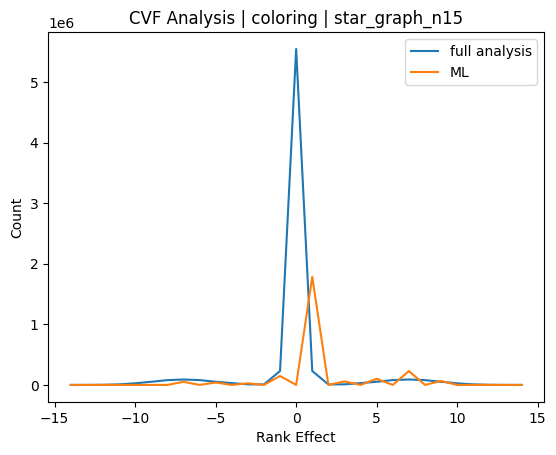

In [12]:
# Create the line plot
sns.lineplot(data=df, x="rank effect", y="count", label="full analysis")
sns.lineplot(data=df, x="rank effect", y="ml_count", label="ML")

# Add labels and title
plt.xlabel("Rank Effect")
plt.ylabel("Count")
plt.title(f"CVF Analysis | {program} | {parse_graph_name(results_file)}")

plt.legend()
# Show plot
plt.show()